# Importes

In [1]:
import matplotlib.pyplot as plt
import circuitos as circ
import numpy as np
import math
import pandas as pd
import splane as tc2

from scipy.optimize import curve_fit
from scipy.misc import derivative
from matplotlib import cm


# Variables globales

In [2]:
FIR_fc = 100
FIR_wc = FIR_fc *2*math.pi
FIR_fs = 1E3
FIR_ws = FIR_fs *2*math.pi
FIR_alpha_b  = 1
FIR_alpha_s  = 40

IIR_fc = 100
IIR_wc = FIR_fc *2*math.pi
IIR_fs = 1E3
IIR_ws = FIR_fs *2*math.pi
IIR_alpha_b  = 3
IIR_alpha_s  = 10

# Condiciones de ajuste
# w0_min <= W0 <= w0_max
# q_min  <= Q  <= q_max 
# k_min <= K <= k_max:

#w0_min = W0/1000
#w0_max = W0*1000
#q_min = Q /10
#q_max = Q *10
#k_min = K /1000
#k_max = K *1000
#bounds = ([w0_min, q_min, k_min],[w0_max, q_max, k_max]) #Para la función de ajuste

# Recolección de datos

### DSO

In [3]:
# DSO

# Define filepath
filepath = 'Datos/Datos_DSO.xlsx'

# Load Excel file using Pandas
f = pd.ExcelFile(filepath)

# Define an empty list to store individual DataFrames
list_of_dfs = []

# Iterate through each worksheet
for sheet in f.sheet_names:
    
    # Parse data from each worksheet as a Pandas DataFrame
    df = f.parse(sheet)

    # And append it to the list
    list_of_dfs.append(df)


f = list_of_dfs[2]

frec_fir_dso = f['Frecuencias'].dropna().to_numpy()

ganancia_fir_dso = f['Ganancia'].dropna().to_numpy()

angulo_fir_dso = f['Δ Ángulo'].dropna().to_numpy()

f = list_of_dfs[0]

frec_iir_dso = f['Frecuencias'].dropna().to_numpy()
ganancia_iir_dso = f['Ganancia'].dropna().to_numpy()

angulo_iir_dso = f['Δ Ángulo'].dropna().to_numpy()


### Analizador de Frecuencia

In [4]:
# Analizador de Frecuencia Amplitud
import csv

# Define filepath
filepath = 'Datos/AF_FIR_Amplitud.csv'
skip_AF_FIR_amplitud = 33

# Load Excel file using Pandas
file = pd.read_csv(filepath, header=2, skiprows=skip_AF_FIR_amplitud,skip_blank_lines = True)

file = file.dropna()

f_ganancia_fir_af = file['X (Hz)'].dropna().to_numpy()

ganancia_fir_af = file['Ch-1 (dBr)'].dropna().to_numpy()

# Define filepath
filepath = 'Datos/AF_FIR_Fase.csv'
skip_AF_FIR_fase = 103

# Load Excel file using Pandas
file = pd.read_csv(filepath, header=2, skiprows=skip_AF_FIR_fase,skip_blank_lines = True)

file = file.dropna()

f_fase_fir_af = file['X (Hz)'].dropna().to_numpy()

fase_fir_af = file['Ch-2 (deg)'].dropna().to_numpy()
fase_fir_af = np.radians(fase_fir_af)%(2*math.pi)

# Define filepath
filepath = 'Datos/AF_IIR_Amplitud.csv'
skip_AF_IIR = 33

# Load Excel file using Pandas
file = pd.read_csv(filepath, header=2, skiprows=skip_AF_IIR,skip_blank_lines = True)

file = file.dropna()

f_ganancia_iir_af = file['X (Hz)'].dropna().to_numpy()

ganancia_iir_af = file['Ch-1 (dBr)'].dropna().to_numpy()

### Gráfico de Módulo

- En los siguientes gráficos se puede observar los datos obtenidos con el instrumental.

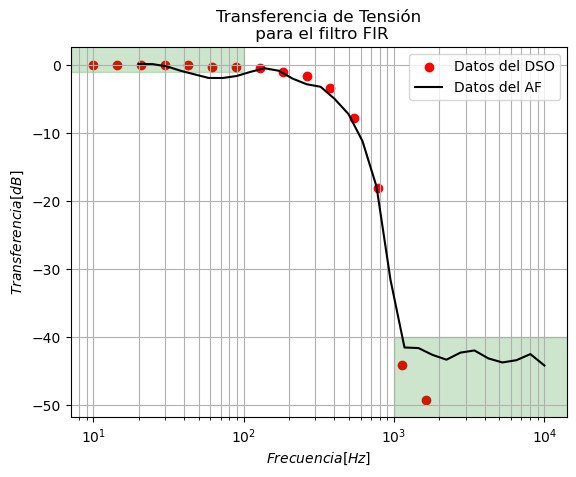

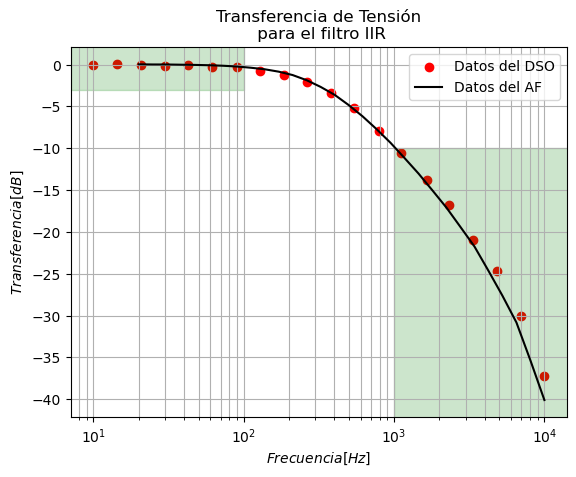

In [5]:
# Gráfico Ganancia del filtro FIR

fig = plt.figure()
ax = fig.add_subplot(111, aspect='auto')

# Grafico los datos en db

ax.scatter(frec_fir_dso[np.nonzero(ganancia_fir_dso)], 20*np.log10(ganancia_fir_dso[np.nonzero(ganancia_fir_dso)]), label='Datos del DSO', color='red')

ax.plot(f_ganancia_fir_af, ganancia_fir_af , label='Datos del AF', color='black')

ax.set_title('Transferencia de Tensión\n para el filtro FIR')

ax.set_xscale('log')
plt.xlabel('$Frecuencia [Hz]$')
ax.set_ylabel('$Transferencia [dB]$')
ax.grid(which='both', axis='both')
ax.legend()

xmin, xmax, ymin, ymax = ax.axis()

circ.dibujar_plantilla_lp(ax, FIR_fc , FIR_fs, FIR_alpha_s, FIR_alpha_b)

plt.show()

# Gráfico Ganancia del filtro IIR

fig = plt.figure()
ax = fig.add_subplot(111, aspect='auto')

# Grafico los datos en db

ax.scatter(frec_iir_dso[np.nonzero(ganancia_iir_dso)], 20*np.log10(ganancia_iir_dso[np.nonzero(ganancia_iir_dso)]), label='Datos del DSO', color='red')

ax.plot(f_ganancia_iir_af, ganancia_iir_af , label='Datos del AF', color='black')

ax.set_title('Transferencia de Tensión\n para el filtro IIR')

ax.set_xscale('log')
plt.xlabel('$Frecuencia [Hz]$')
ax.set_ylabel('$Transferencia [dB]$')
ax.grid(which='both', axis='both')
ax.legend()

xmin, xmax, ymin, ymax = ax.axis()

circ.dibujar_plantilla_lp(ax, IIR_fc , IIR_fs, IIR_alpha_s, IIR_alpha_b)

plt.show()

### Gráfico de Fase

- En los siguientes gráficos se puede observar los datos obtenidos con el instrumental y además su respectivo ajuste.

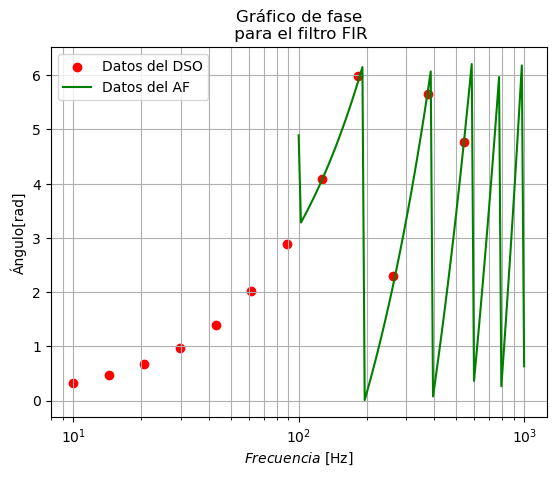

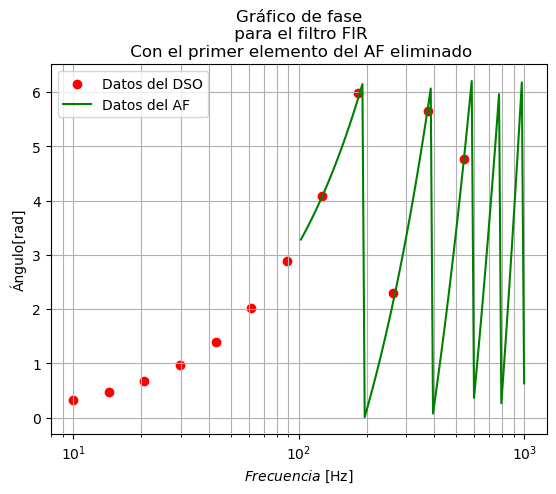

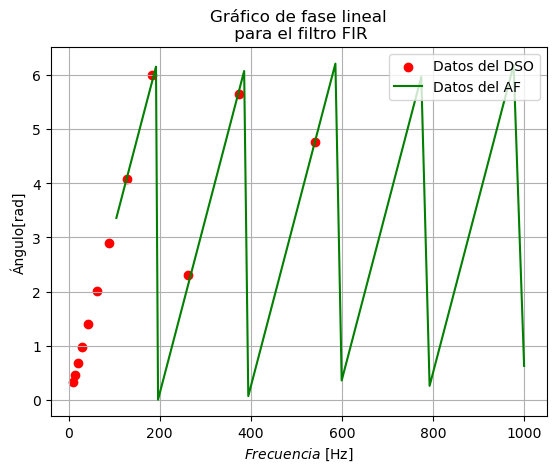

In [6]:
# Gráfico fase
fig = plt.figure()

ax = fig.add_subplot(111, aspect='auto')

angulo_fir_dso = angulo_fir_dso%(2*math.pi)

ax.scatter(frec_fir_dso[angulo_fir_dso != 0], angulo_fir_dso[angulo_fir_dso != 0], label='Datos del DSO', color='red')

ax.plot(f_fase_fir_af, fase_fir_af , label='Datos del AF', color='green')

# Configuraciones del plot

plt.xlabel('$Frecuencia$ [Hz]')
plt.ylabel('Ángulo[rad]')
ax.grid(which='both', axis='both')
ax.set_xscale("log")
ax.set_title('Gráfico de fase\n para el filtro FIR')
plt.legend()

plt.show()

# Elimino el primer dato del analizador de frecuencia, porque no es correcto.

f_fase_fir_af = np.delete(f_fase_fir_af, 0)
fase_fir_af = np.delete(fase_fir_af, 0)

fig = plt.figure()

ax = fig.add_subplot(111, aspect='auto')

angulo_fir_dso = angulo_fir_dso%(2*math.pi)

ax.scatter(frec_fir_dso[angulo_fir_dso != 0], angulo_fir_dso[angulo_fir_dso != 0], label='Datos del DSO', color='red')

ax.plot(f_fase_fir_af, fase_fir_af , label='Datos del AF', color='green')

# Configuraciones del plot

plt.xlabel('$Frecuencia$ [Hz]')
plt.ylabel('Ángulo[rad]')
ax.grid(which='both', axis='both')
ax.set_xscale("log")
ax.set_title('Gráfico de fase\n para el filtro FIR\n Con el primer elemento del AF eliminado')
plt.legend()

plt.show()


# Grafico en escala linear para ver la linealidad.

fig = plt.figure()

ax = fig.add_subplot(111, aspect='auto')

angulo_fir_dso = angulo_fir_dso%(2*math.pi)

ax.scatter(frec_fir_dso[angulo_fir_dso != 0], angulo_fir_dso[angulo_fir_dso != 0], label='Datos del DSO', color='red')

ax.plot(np.delete(f_fase_fir_af, 0), np.delete(fase_fir_af, 0) , label='Datos del AF', color='green')

# Configuraciones del plot

plt.xlabel('$Frecuencia$ [Hz]')
plt.ylabel('Ángulo[rad]')
ax.grid(which='both', axis='both')
ax.set_xscale("linear")
ax.set_title('Gráfico de fase lineal\n para el filtro FIR')
plt.legend()

plt.show()


### Gráfico de Retardo de grupo

- Este gráfico se realizó con los datos del ajuste en fase.
- Se utiliza la función derivate del módulo scipy.

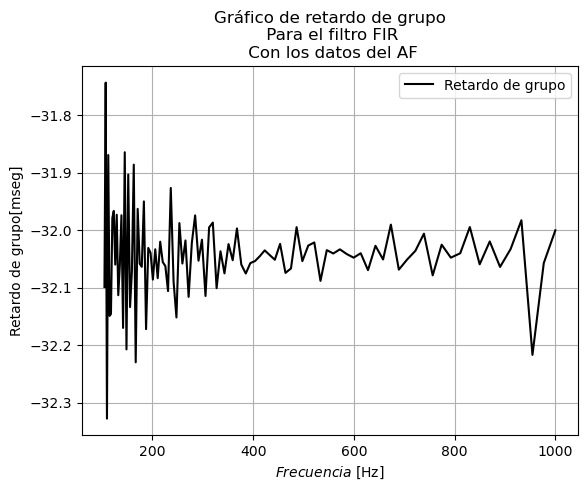

In [11]:
# Retardo de Grupo

# Gráfico Retardo de grupo

group_delay = - np.diff(np.unwrap(fase_fir_af))/ np.diff(f_fase_fir_af) # Segundos
group_delay = - np.diff(np.unwrap(fase_fir_af))/ np.diff(f_fase_fir_af) *1000 # miliSegundos

fig = plt.figure()
ax = fig.add_subplot(111, aspect='auto')

plt.plot(np.delete(f_fase_fir_af, 0), group_delay, color='black', label='Retardo de grupo')

# Configuraciones del plot

plt.xlabel('$Frecuencia$ [Hz]')
plt.ylabel('Retardo de grupo[mseg]')
ax.grid(which='both', axis='both')
ax.set_title("Gráfico de retardo de grupo\n Para el filtro FIR\n Con los datos del AF")
plt.legend()

plt.show()